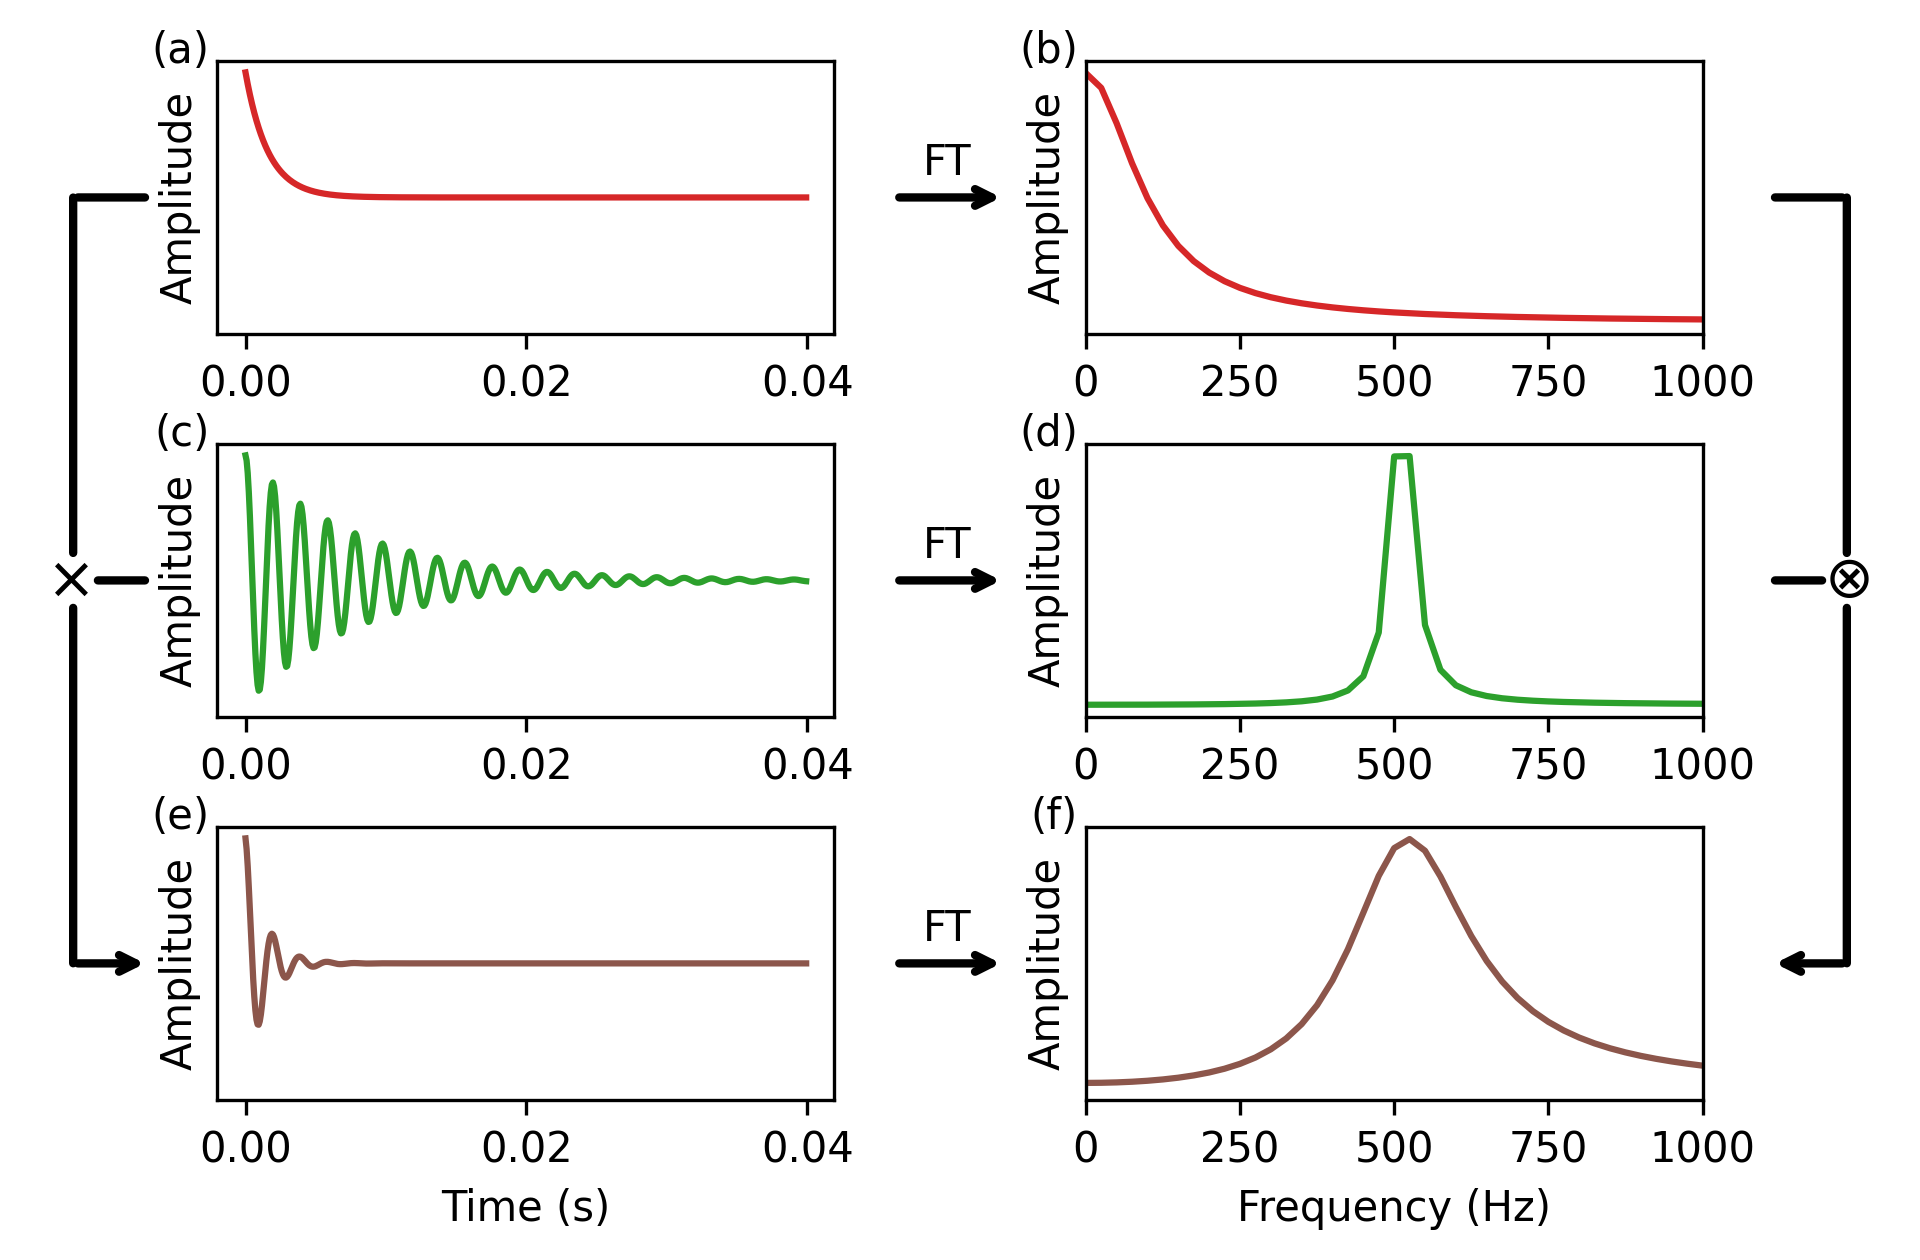

In [155]:
# plot for the sampling section
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Time-domain parameters
DW = 1 / 800 / 16  # dwell time
SI = 256 * 2  # size i.e. number of sampled points
timeStamp = DW * np.arange(SI)
T2 = DW * SI * 0.2
initial_phase = 0 * np.pi / 4
envelope = np.exp(-timeStamp / T2)
nu_Larmor = SI * 1
s_t_smooth = envelope * (
    np.cos(2 * np.pi * nu_Larmor * timeStamp + initial_phase)
    + 1j * 0 * np.sin(2 * np.pi * nu_Larmor * timeStamp + initial_phase)
)
# Set the seed
np.random.seed(42)

noise = np.random.normal(0, 1, SI) + 1j * 0 * np.random.normal(0, 1, SI)
s_t_noisy = s_t_smooth + 0.0 * noise

# window_func = envelope
window_func = np.exp(-timeStamp / (T2 * 0.2))
s_t_win = s_t_noisy * window_func

# Compute FFT
fft_win = np.fft.fft(window_func)
fft_win_sq = np.abs(fft_win) ** 2

fft_smooth = np.fft.fft(s_t_smooth)
fft_smooth_sq = np.abs(fft_smooth) ** 2

# fft_noisy = np.fft.fft(s_t_noisy * 1)
fft_noisy = np.fft.fft(s_t_noisy * window_func)
fft_noisy_sq = np.abs(fft_noisy) ** 2

freqs = np.fft.fftfreq(SI, DW)

# sorting
fft_win_sq = fft_win_sq[np.argsort(freqs)]
fft_smooth_sq = fft_smooth_sq[np.argsort(freqs)]
fft_noisy_sq = fft_noisy_sq[np.argsort(freqs)]

freqs = np.sort(freqs)

# Plotting setup
fontsize = 10
plt.rc("font", size=fontsize)  # font size for all figures
plt.rc("figure", titlesize=fontsize)  # Figure title
plt.rc("axes", titlesize=fontsize)  # Axes title

nrows, ncols = (3, 5)

row_win_idx = 0
row_sig_rect_idx = 1
row_sig_expo_idx = 2

col_multi_idx = 0
col_time_idx = 1
clo_FTarrow_idx = 2
col_freq_idx = 3
col_conv_idx = 4

fig = plt.figure(figsize=(8, 4.5 *1), dpi=300)  # initialize a figure
gs = gridspec.GridSpec(
    nrows=nrows, ncols=ncols, width_ratios=[0.2, 1, 0.2, 1, 0.2], height_ratios=[0.5, 0.5, 0.5]
)  # create grid for multiple figures

# fix the margins
wspace = 0.2
hspace = 0.4
fig.subplots_adjust(wspace=wspace, hspace=hspace)
axs = []
for i in range(nrows):
    axs.append([])
    for j in range(ncols):
        axs[-1].append(fig.add_subplot(gs[i, j]))
axs = np.array(axs)


# --- left plots: Arrow with \times labels ---

for i, ax in enumerate(axs[:, col_multi_idx]):
    ax.axis("off")
for i, ax in enumerate(axs[:, col_conv_idx]):
    ax.axis("off")
# ax = axs[row_sig_expo_idx, col_multi_idx]


ax = axs[row_sig_expo_idx, col_multi_idx]
# ax.text(0.4, 0.65, "$\\times$", ha="center", va="bottom")
# ax.annotate(
#     "", xy=(-0.97, 0.5), xytext=(-0.2, 0.5), arrowprops=dict(arrowstyle="->", lw=2)
# )

show_multi = True
if show_multi:
    #     x_left
    #      -------> 0.5
    #      |
    #      |
    #      |
    #      v
    #      x<------ 0.5
    #      |
    #      |
    #      |
    #      |
    #      v
    #      -------> 0.5
    x_left = 0.35
    x_right = 1.0
    y_mid = 0.5
    offset_from_symbol = 0.07
    connect_thick = 0.03
    y_full = 1.0 + hspace
    # \times
    axs[row_sig_rect_idx, col_multi_idx].text(
        0.3, 0.5, "$\\times$", ha="center", va="center", fontsize=14,
    )
    # \otimes
    # axs[row_sig_rect_idx, col_multi_idx].text(
    #     0.0,
    #     0.5,
    #     "$\\otimes$",
    #     ha="center",
    #     va="center",
    #     fontsize=14,
    # )

    # --------------- top plot ---------------
    arrow_coo = {
        "start": {"x": x_left - connect_thick, "y": 0.5},
        "stop": {"x": x_right, "y": 0.5},
    }
    axs[row_win_idx, col_multi_idx].annotate(
        "",
        xytext=(arrow_coo["start"]["x"], arrow_coo["start"]["y"]),
        xy=(arrow_coo["stop"]["x"], arrow_coo["stop"]["y"]),
        arrowprops=dict(arrowstyle="-", lw=2),
    )

    # --------------- mid plot ---------------
    arrow_coo = {
        "start": {"x": x_left, "y": 0.5 + y_full + connect_thick},
        "stop": {"x": x_left, "y": 0.5 + offset_from_symbol},
    }
    axs[row_sig_rect_idx, col_multi_idx].annotate(
        "",
        xytext=(arrow_coo["start"]["x"], arrow_coo["start"]["y"]),
        xy=(arrow_coo["stop"]["x"], arrow_coo["stop"]["y"]),
        arrowprops=dict(arrowstyle="-", lw=2),
    )

    arrow_coo = {"start": {"x": x_left+1.9 * offset_from_symbol, "y": 0.5}, "stop": {"x": x_right, "y": 0.5}}
    axs[row_sig_rect_idx, col_multi_idx].annotate(
        "",
        xytext=(arrow_coo["start"]["x"], arrow_coo["start"]["y"]),
        xy=(arrow_coo["stop"]["x"], arrow_coo["stop"]["y"]),
        arrowprops=dict(arrowstyle="-", lw=2),
    )

    # --------------- bottom plot ---------------
    arrow_coo = {
        "start": {"x": x_left, "y": 0.5 + y_full - offset_from_symbol},
        "stop": {"x": x_left, "y": 0.5 - connect_thick},
    }
    ax.annotate(
        "",
        xytext=(arrow_coo["start"]["x"], arrow_coo["start"]["y"]),
        xy=(arrow_coo["stop"]["x"], arrow_coo["stop"]["y"]),
        arrowprops=dict(arrowstyle="-", lw=2),
    )

    arrow_coo = {"start": {"x": x_left-connect_thick, "y": 0.5}, "stop": {"x": x_right, "y": 0.5}}
    ax.annotate(
        "",
        xytext=(arrow_coo["start"]["x"], arrow_coo["start"]["y"]),
        xy=(arrow_coo["stop"]["x"], arrow_coo["stop"]["y"]),
        arrowprops=dict(arrowstyle="->", lw=2),
    )


show_conv = True
if show_conv:
    #   x_left  x_right
    #      -------> 0.5
    #             |
    #             |
    #             |
    #             v
    #      <------O 0.5
    #             |
    #             |
    #             |
    #             |
    #             v
    #      -------> 0.5
    x_left = 0
    x_right = 0.65
    y_mid = 0.5
    offset_from_symbol = 0.07
    connect_thick = 0.03
    y_full = 1.0 + hspace

    # \otimes
    axs[row_sig_rect_idx, col_conv_idx].text(
        x_right,
        0.5,
        "$\\otimes$",
        ha="center",
        va="center",
        fontsize=14,
    )

    # --------------- top plot ---------------
    arrow_coo = {
        "start": {"x": x_left , "y": 0.5},
        "stop": {"x": x_right + connect_thick, "y": 0.5},
    }
    axs[row_win_idx, col_conv_idx].annotate(
        "",
        xytext=(arrow_coo["start"]["x"], arrow_coo["start"]["y"]),
        xy=(arrow_coo["stop"]["x"], arrow_coo["stop"]["y"]),
        arrowprops=dict(arrowstyle="-", lw=2),
    )

    # --------------- mid plot ---------------
    arrow_coo = {
        "start": {"x": x_right, "y": 0.5 + y_full + connect_thick},
        "stop": {"x": x_right, "y": 0.5 + offset_from_symbol},
    }
    axs[row_sig_rect_idx, col_conv_idx].annotate(
        "",
        xytext=(arrow_coo["start"]["x"], arrow_coo["start"]["y"]),
        xy=(arrow_coo["stop"]["x"], arrow_coo["stop"]["y"]),
        arrowprops=dict(arrowstyle="-", lw=2),
    )

    arrow_coo = {
        "start": {"x": x_left , "y": 0.5},
        "stop": {"x": x_right - 1.9* offset_from_symbol, "y": 0.5},
    }
    axs[row_sig_rect_idx, col_conv_idx].annotate(
        "",
        xytext=(arrow_coo["start"]["x"], arrow_coo["start"]["y"]),
        xy=(arrow_coo["stop"]["x"], arrow_coo["stop"]["y"]),
        arrowprops=dict(arrowstyle="-", lw=2),
    )

    # --------------- bottom plot ---------------
    arrow_coo = {
        "start": {"x": x_right, "y": 0.5 + y_full - offset_from_symbol},
        "stop": {"x": x_right, "y": 0.5 - connect_thick},
    }
    axs[row_sig_expo_idx, col_conv_idx].annotate(
        "",
        xytext=(arrow_coo["start"]["x"], arrow_coo["start"]["y"]),
        xy=(arrow_coo["stop"]["x"], arrow_coo["stop"]["y"]),
        arrowprops=dict(arrowstyle="-", lw=2),
    )

    arrow_coo = {
        "start": {"x": x_left , "y": 0.5},
        "stop": {"x": x_right+ connect_thick, "y": 0.5},
    }
    axs[row_sig_expo_idx, col_conv_idx].annotate(
        "",
        xytext=(arrow_coo["start"]["x"], arrow_coo["start"]["y"]),
        xy=(arrow_coo["stop"]["x"], arrow_coo["stop"]["y"]),
        arrowprops=dict(arrowstyle="<-", lw=2),
    )


# --- Middle right plots: Arrow with transform labels ---

for i, ax in enumerate(
    axs[:, clo_FTarrow_idx]
):
    ax.axis("off")
    # Fourier transform
    ax.text(0.4, 0.55, "FT", ha="center", va="bottom")
    ax.annotate(
        "", xy=(0.9, 0.5), xytext=(-0.06, 0.5), arrowprops=dict(arrowstyle="->", lw=2)
    )

# --- left right plots: time-domain ---


axs[row_win_idx, col_time_idx].plot(timeStamp, window_func, color="tab:red")
axs[row_sig_rect_idx, col_time_idx].plot(timeStamp, s_t_smooth.real, color="tab:green")
# axs[0, col_idx_time].plot(timeStamp, s_t_smooth.imag, color="tab:green")

# axs[row_inx_noisy, col_idx_time].plot(
#     timeStamp, s_t_smooth, color="tab:red", linestyle="-", zorder=10, alpha=0.5
# )

axs[row_sig_expo_idx, col_time_idx].plot(timeStamp, s_t_win.real, color="tab:brown", alpha=1)
# axs[1, col_idx_time].plot(timeStamp, s_t_noisy.imag, color="tab:green")


ylim0, ylim1 = axs[row_sig_rect_idx, col_time_idx].get_ylim()
ylim2, ylim3 = axs[row_sig_expo_idx, col_time_idx].get_ylim()
ylim_abs_max = np.amax(np.abs([ylim0, ylim1, ylim2, ylim3]))
for i, ax in enumerate(list(axs[:, col_time_idx])):
    # axs[1, col_idx_time].plot(timeStamp, envelope, color="tab:red", linestyle="--", zorder=10)
    # ax.set_xlim(0, 150)
    ax.set_ylim(-ylim_abs_max, ylim_abs_max)
    # ax.set_xticks([0, 0.05, 0.1col_idx_time])
    ax.set_yticks([])
    # ax.set_title(titles[i])
    ax.set_ylabel("Amplitude")

axs[-1, col_time_idx].set_xlabel("Time (s)")


# --- right right plots: frequency-domain ---


ax = axs[row_win_idx, col_freq_idx]
ax.plot(freqs, fft_win_sq, color="tab:red")

ax = axs[row_sig_rect_idx, col_freq_idx]
ax.plot(freqs, fft_smooth_sq, color="tab:green")

ax = axs[row_sig_expo_idx, col_freq_idx]
ax.plot(freqs, fft_noisy_sq, color="tab:brown")
for i, ax in enumerate(list(axs[:, col_freq_idx])):

    # axs[0, col_idx_time].plot(timeStamp, envelope, color="tab:red", linestyle="--", zorder=10)
    # ax.set_xticks([0, 0.05, 0.1col_idx_time])
    ax.set_yticks([])
    # ax.set_title(titles[i])
    ax.set_xlim(0, 1000)
    ax.set_ylabel("Amplitude")
axs[-1, col_freq_idx].set_xlabel("Frequency (Hz)")

for i, ax in enumerate(
    np.array(
        [
            axs[row_win_idx, col_time_idx],
            axs[row_win_idx, col_freq_idx],
            axs[row_sig_rect_idx, col_time_idx],
            axs[row_sig_rect_idx, col_freq_idx],
            axs[row_sig_expo_idx, col_time_idx],
            axs[row_sig_expo_idx,col_freq_idx],
        ]
    )
):
    # xleft, xright = ax.get_xlim()
    # ybottom, ytop = ax.get_ylim()
    ax.text(
        -0.013,
        0.96,
        s="(" + chr(i + ord("a")) + ")",
        transform=ax.transAxes,
        ha="right",
        va="bottom",
        color="k",
    )